In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록


**변수 설명**

    CustomerID : Unique ID assigned to the customer
    
    Gender :  Gender of the customer 
    
    Age : Age of the customer
    
    Annual Income : Annual Income of the customee
    
    Spending Score : Score assigned by the mall based on customer behavior and spending nature

    
    

### 1. 데이터분석

In [112]:
data = pd.read_csv('Mall_Customers.csv')
data.head()
data.Gender = data.Gender.apply(lambda x : 1 if x == 'Male' else 0)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [114]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [115]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

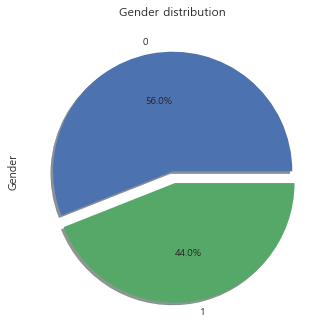

In [116]:
f, axes = plt.subplots(1,1)
data.Gender.value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = axes, shadow = True)
axes.set_title('Gender distribution')
plt.show()

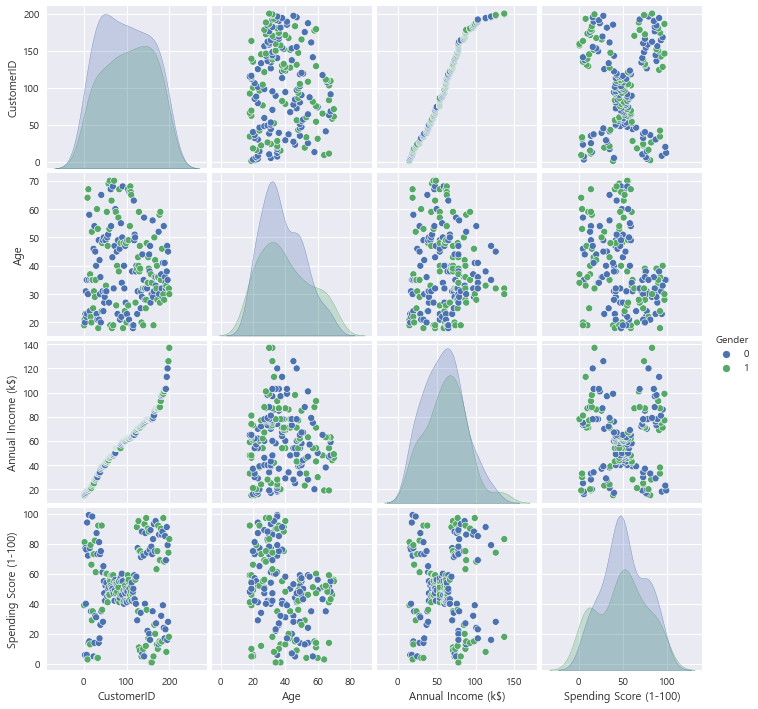

In [117]:
sns.pairplot(data, hue = 'Gender')
plt.show()

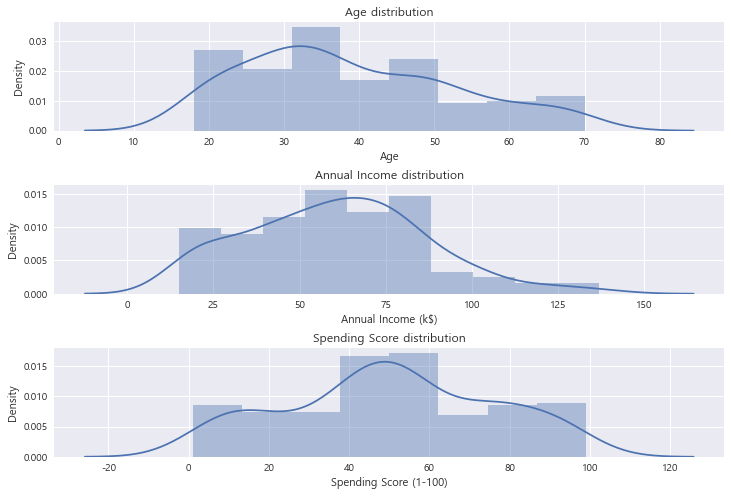

In [118]:
f, axes = plt.subplots(3, 1 ,figsize = (12, 8))
plt.subplots_adjust(hspace = 0.5)
sns.distplot(data['Age'], ax = axes[0])

sns.distplot(data['Annual Income (k$)'], ax = axes[1])
sns.distplot(data['Spending Score (1-100)'], ax = axes[2])

axes[0].set_title('Age distribution')
axes[1].set_title('Annual Income distribution')
axes[2].set_title('Spending Score distribution')

plt.show()

- 데이터는 총 200개의 Customer에 대한 정보를 가지고 있으며 결측치는 존재하지 않는다.
- `Gender`에 대한 분포를 살펴보면 male의 비율 44%로 성별에 대하여 잘 분포되어 있음을 확인할 수 있다.
- `Gender`에 대하여 변수들의 분포를 관계를 살펴보면 전체적으로 비슷한 분포를 보이고 있음을 확인할 수 있다. 
- 다음으로, 나머지 변수에 대하여 분포를 확인해 보면 `Age`의 경우 살짝 왼쪽으로 치우쳐져 있지만 이는 연령대가 30-40 이 많으므로 감안하여 확인을 해야한다.
- `Annual Income`의 경우 90이상의 경우 비율이 작아지므로 이상치가 있을 수도 있음을 생각해야한다.
- `Spending Score`의 경우 정규분포의 형태를 보인다.

#### 이상치 확인

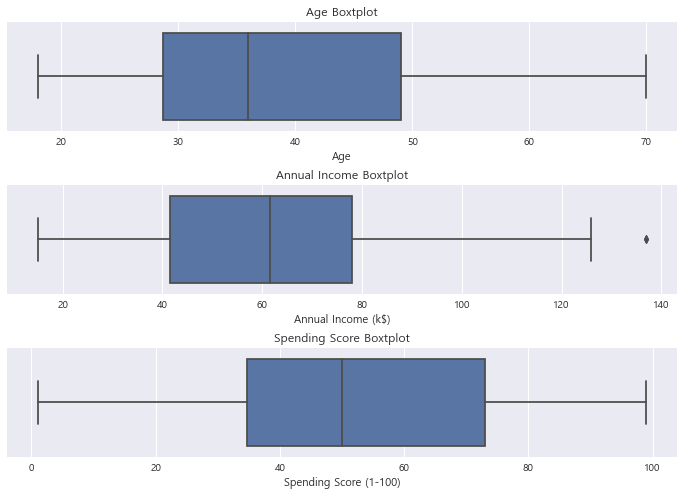

In [119]:
f, axes = plt.subplots(3, 1 ,figsize = (12, 8))
plt.subplots_adjust(hspace = 0.5)

sns.boxplot(data['Age'], ax = axes[0])
sns.boxplot(data['Annual Income (k$)'], ax = axes[1])
sns.boxplot(data['Spending Score (1-100)'], ax = axes[2])

axes[0].set_title('Age Boxtplot')
axes[1].set_title('Annual Income Boxtplot')
axes[2].set_title('Spending Score Boxtplot')

plt.show()

In [120]:
data[data['Annual Income (k$)'] > 130]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,1,32,137,18
199,200,1,30,137,83


- 이상치를 확인해 보면 `Annual Income` 변수에 이상치가 존재한다. 값이 130보다 큰 경우를 살펴보면 전체 200개의 데이터 중 2개의 데이터가 이상치로 나타난다. 이는 전체의 1%에 해당하므로 별도로 처리를 하지 않고 넘어가기로 한다.

### 2. Clustering

In [121]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import *
from sklearn.metrics import * 


scaler = StandardScaler()
y = data.Gender
data.drop(columns = ['Gender','CustomerID'], axis = 1, inplace = True)

data_columns = data.columns

data = pd.DataFrame(scaler.fit_transform(data), columns = data_columns) # 분석을 위하여 정규화를 진행한다.

In [122]:
data

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


####  2-1 .K-Means Clustering

    KMeans 알고리즘은 n개의 중심점을 찍은 후에 이 중심점에서 각 점간의 거리의 합이 가장 최소화가 되는 중심점 n의 위치를 찾고 이 중심점에서 가까운 점들을 중심점을 기준으로 묶는 클러스터링 알고리즘이다. 
    
    따라서 n의 값이 중요한 파라미터로 적용되는데 이를 확인하기 위해서 Elbow Method 또는 Silhouette Coefficient를 확인 한다. 
    
    k의 범위를 지정해주고 성능을 비교하며 최적의 k를 확인한다. 

#### Elbow Method

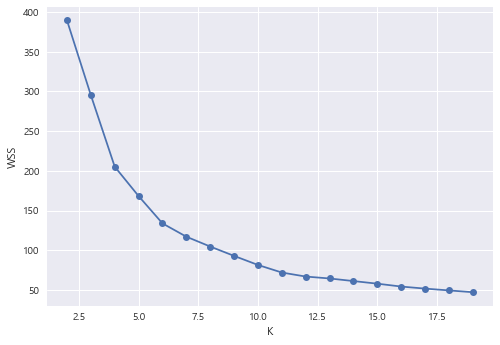

In [123]:
from sklearn.cluster import *

wss = []
x = data.copy()
for i in range(2, 20) :
    k_means = KMeans(n_clusters = i, random_state = 5)
    k_means.fit(x)
    wss.append(k_means.inertia_)
    
plt.plot(range(2,20), wss, marker = 'o')
plt.xlabel('K')
plt.ylabel('WSS')
plt.show()


- 군집 내 편차제곱합을 그린 그래프의 변곡점을 보면 5 - 7 사이에서 변화의 폭이 크지 않음을 확인 할 수 있다.
- 이 데이터의 경우 K 가 6일 때 변화의 폭이 크지 않음을 볼 수 있다.

#### Silhouette Coefficient

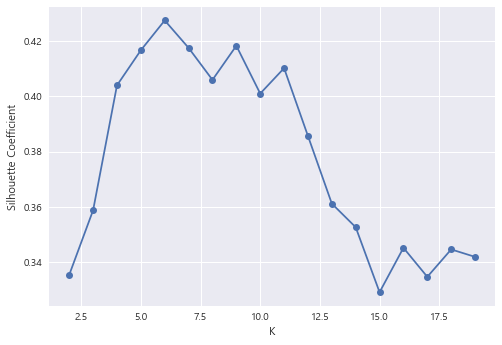

In [124]:
s_score = []
x = data.copy()
for i in range(2, 20) :
    k_means = KMeans(n_clusters = i, random_state = 5)
    k_means.fit(x)
    pred = k_means.labels_
    s_score.append(silhouette_score(x, pred))
    
plt.plot(range(2,20), s_score, marker = 'o')
plt.xlabel('K')
plt.ylabel('Silhouette Coefficient')
plt.show()


- Silhouette Coefficient 를 확인해 보면 K 가 6일 때 가장 큰 값을 가지고 있다. 
- 따라서 최적의 K값은 6으로 알 수있다.

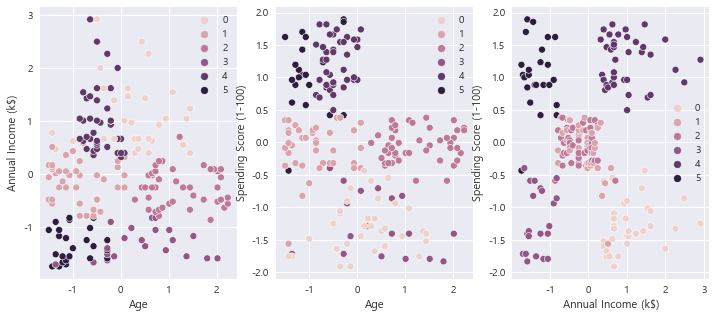

In [171]:
# 각 변수별 clustering 결과 시각화

k_means = KMeans(n_clusters=6, random_state=5)
k_means.fit(data)
pred_k = k_means.labels_
f, axes = plt.subplots(1, len(data.columns), figsize = (12, 5))

sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue=pred_k, ax = axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue=pred_k, ax = axes[1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=pred_k, ax = axes[2])
plt.show()


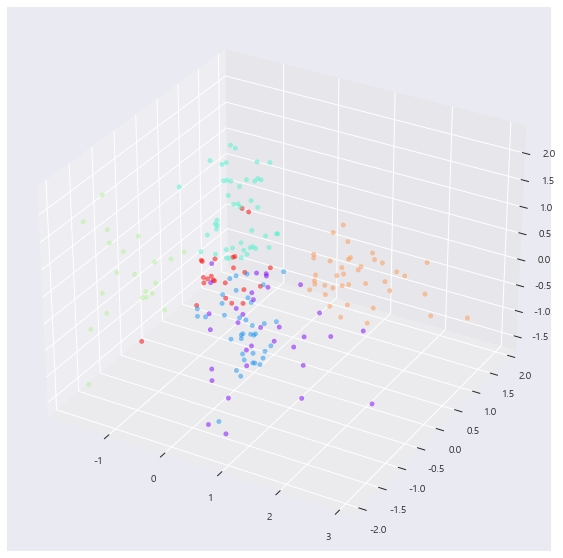

In [172]:
# data clustering 결과 3차원 시각화

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d') 

x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
z = data['Age']
axes.scatter(x, y, z, c = pred_k, s= 20, alpha=0.5, cmap='rainbow')
plt.show()

- 각 변수별 clustering 결과는 잘 구분하는것을 보이고 있다.
- 3차원으로 시각화해 보면 일부는 군집화는 잘 되는것을 확인할 수 있지만 구분하기 힘들 군집도 있음을 확인할 수 있다.

####  2-2 .DBSCAN Clustering
    
      DBSCAN Clustering은 밀도 방식의 클러스터링을 사용하는 알고리즘이다. 
      
      앞에서 진행한 K Means는 군집간 거리를 이용하여 클러스터링을 하는 방법이면  DBCAN 클러스터링은 데이터가 세밀하기 몰려 있어 밀도가 높은 부분을 클러스터링을 하는 방식이다.
      
      한 점을 중심으로 epsilon 반경내에 min samples 이상수의 점이 있으면 그 점을 중심으로 군집화가 되고 그 점을 Core Point라 한다.
      
      K Means와 다르게 K를 정하지 않아도 되며 밀도에 따라 군집들을 서로 연결하기 때문에 기하학적인 모양을 갖는 군집도 잘 찾을 수 있다. 또한 Outlier 검출이 가능하다
      
      따라서 epsilon과 min samples가 주요 하이퍼 파라미터 이므로 이를 조절하는 것이 중요하다.

In [155]:
def get_values(x, pred):
    result = dict()
    unique = np.unique(pred)
    for i in unique :
        values = sum(pred == i)
        result.update({i : values})
    return result

In [170]:
x = data.copy()
eps = [0.5, 1, 3, 5 ,7, 9 , 11, 13, 15, 17]
min_samples = range(1,10, 2)
for ep in eps :
    for sample in min_samples :
        dbscan = DBSCAN(eps= ep, min_samples= sample)
        pred = dbscan.fit_predict(x)
        print('eps = {} & min_samples = {}'.format(ep, sample))
        print('군집 수 : ', len(np.unique(pred)))
        print('군집 별 개수 : ', get_values(x, pred) )
        print('')

eps = 0.5 & min_samples = 1
군집 수 :  33
군집 별 개수 :  {0: 1, 1: 18, 2: 1, 3: 90, 4: 2, 5: 1, 6: 2, 7: 2, 8: 4, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 34, 17: 2, 18: 10, 19: 4, 20: 5, 21: 1, 22: 1, 23: 3, 24: 2, 25: 1, 26: 2, 27: 1, 28: 1, 29: 2, 30: 1, 31: 1, 32: 1}

eps = 0.5 & min_samples = 3
군집 수 :  9
군집 별 개수 :  {-1: 32, 0: 18, 1: 90, 2: 4, 3: 34, 4: 10, 5: 4, 6: 5, 7: 3}

eps = 0.5 & min_samples = 5
군집 수 :  7
군집 별 개수 :  {-1: 60, 0: 17, 1: 5, 2: 51, 3: 28, 4: 32, 5: 7}

eps = 0.5 & min_samples = 7
군집 수 :  5
군집 별 개수 :  {-1: 79, 0: 14, 1: 48, 2: 29, 3: 30}

eps = 0.5 & min_samples = 9
군집 수 :  5
군집 별 개수 :  {-1: 103, 0: 10, 1: 36, 2: 22, 3: 29}

eps = 1 & min_samples = 1
군집 수 :  2
군집 별 개수 :  {0: 199, 1: 1}

eps = 1 & min_samples = 3
군집 수 :  2
군집 별 개수 :  {-1: 1, 0: 199}

eps = 1 & min_samples = 5
군집 수 :  2
군집 별 개수 :  {-1: 2, 0: 198}

eps = 1 & min_samples = 7
군집 수 :  2
군집 별 개수 :  {-1: 3, 0: 197}

eps = 1 & min_samples = 9
군집 수 :  2
군집 별 개수 :  {-1: 4, 0: 196}

eps = 3 & min_sampl

- for 문을 이용하여 label을 군집화한 결과를 확인해 보면 eps : 0.5, min_samples : 5일 경우 잘 분류 된것을 확인할 수 있디.
    

In [173]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)
pred_db = dbscan.fit_predict(data)

In [180]:
print('Silhouette_score : ', silhouette_score(data, pred_db))

Silhouette_score :  0.18451372756506046


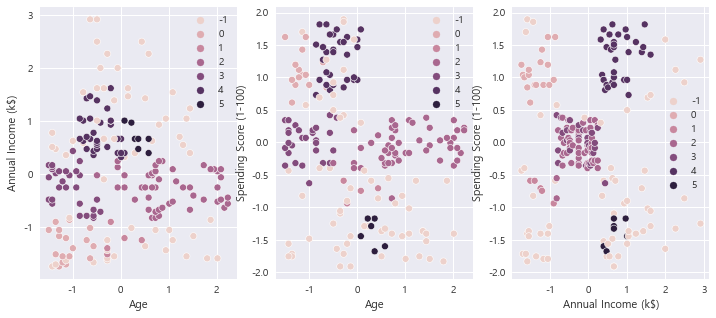

In [174]:
# 각 변수별 clustering 결과 시각화

f, axes = plt.subplots(1, len(data.columns), figsize = (12, 5))

sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue=pred_db, ax = axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue=pred_db, ax = axes[1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=pred_db, ax = axes[2])
plt.show()

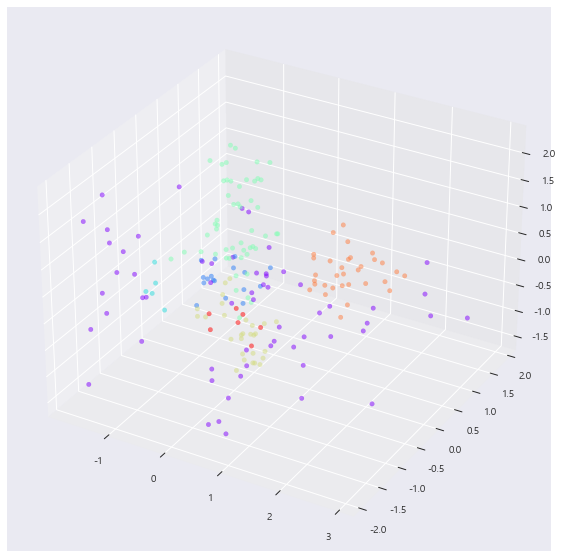

In [179]:
# data clustering 결과 3차원 시각화

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d') 

x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
z = data['Age']
axes.scatter(x, y, z, c = pred_db, s= 20, alpha=0.5, cmap='rainbow')
plt.show()

- 각 변수별 군집화를 확인해 보면 이전의 결과보다 잘 못 분류함을 확인할 수 있다. 
- 특히 `Age`와 `Spending Score`의 관계를 비교해 보면 결측치로 판단하는 경우가 많다는것을 볼 수 있다.
- 또한 3차원으로 보았을 때 군집이 퍼져있는것을 확인할 수 있다.
- silhouette score을 확인해 보면 상당히 낮은것을 확인할 수 있다.

####  2-3 . Hierarchical Clustering
    
     Hierarchical Clustering 방법은 데이터를 계층에 따라 순차적으로 클러스터링 하는 기법이다. 
     
     Agglomerative Hierarchical Clustering은 데이터가 모두 나눠져있는 상태에서, 작은 단위로부터 클러스터링을 시작하여 모든 데이터를 묶을 때까지 반복하는 방식으로 클러스터링을 진행한다. 
     
     이 때, 유사도가 높은 데이터를 묶으면서 진행되는데 유사도 측정 방법에는 다음과 같다.
     
     Single Linkage(단일 연결법), Complete Linkage(완전 연결법), Average Linkage(평균 연결법), Ward linkage(와드 연결법)

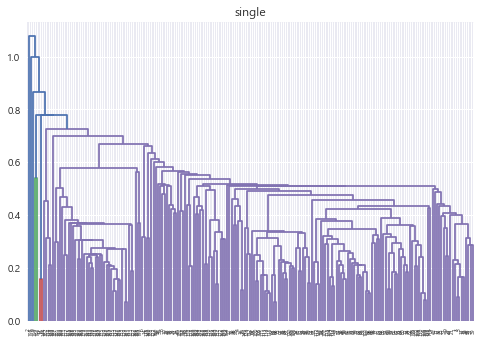

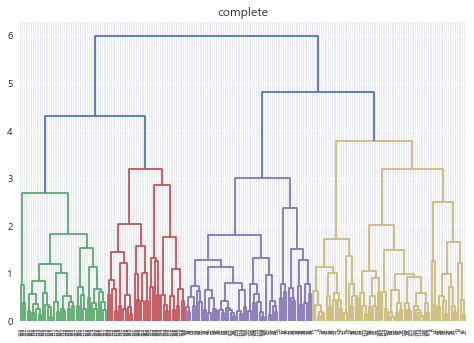

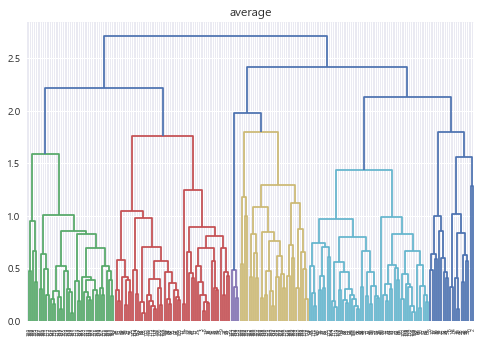

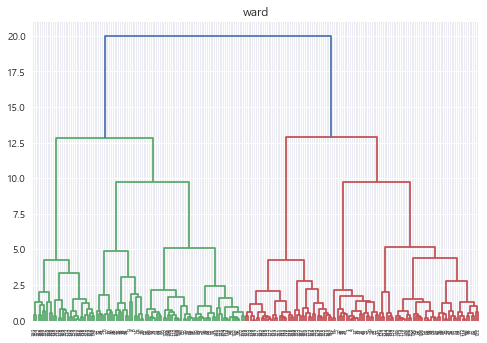

In [182]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_method = ['single', 'complete', 'average', 'ward']
x = data.copy()
for method in linkage_method :
    cluster = linkage(x, method = method)
    
    plt.title(methodb)
    dendrogram(cluster)
    plt.show()
    

- 위의 결과는  Single Linkage(단일 연결법), Complete Linkage(완전 연결법), Average Linkage(평균 연결법), Ward linkage(와드 연결법) 별 dendrogram을 그린 결과이다

- 이 중 분류가 깔끔하게 된 complete방법을 이용하여 clustering을 진행한다.

In [184]:
hc = AgglomerativeClustering(n_clusters=3 , linkage='complete')
pred_hc = hc.fit_predict(data)

In [187]:
print('Silhouette_score : ', silhouette_score(data, pred_hc))

Silhouette_score :  0.28384379984299635


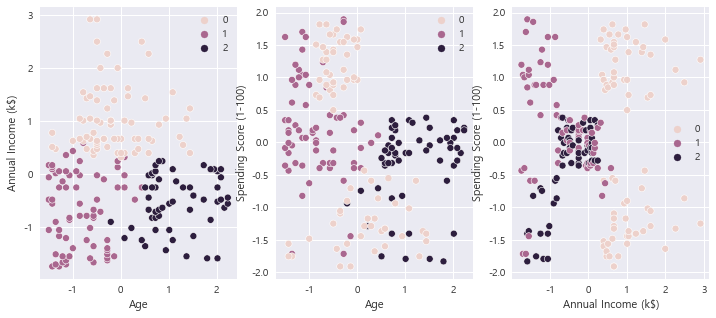

In [185]:
f, axes = plt.subplots(1, len(data.columns), figsize = (12, 5))

sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue=pred_hc, ax = axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue=pred_hc, ax = axes[1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=pred_hc, ax = axes[2])
plt.show()

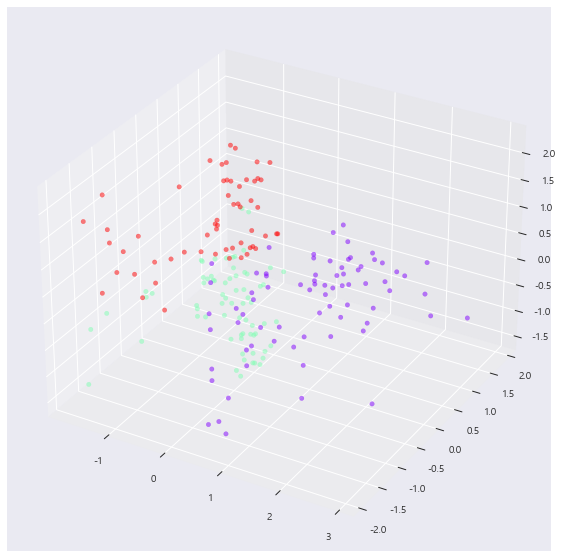

In [186]:
# data clustering 결과 3차원 시각화

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d') 

x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
z = data['Age']
axes.scatter(x, y, z, c = pred_hc, s= 20, alpha=0.5, cmap='rainbow')
plt.show()

- 결과를 확인해 보면 앞의 DBSCAN과 달리 상당히 잘 군집화 된것을 확인할 수 있다.
- 또한 3차원 시각화도 확인해보면 분류가 깔끔하게 된것을 확인할 수 있다.
- Silhouette_score 도 앞선 dbscan보다 좋음을 볼 수 있다.

####  2-4 . Spectral Clustering

    기존의 K means 클러스터링의 경우 Parameteric-based 방법이라고 정의할 수 있다. 이에 비해 Spectral Clustering은 Graph-based 방법인데 기존의 방법과 각 데이터의 점들과 다른 점 사이에 거리를 재어 군집화 하는 부분에 대해서는 비슷하지만 이 방법은 데이터 간의 유사도에 따라 가중치를 부여하여 군집화를 진행한다.
    
    방법을 간단히 설명하자면, 개체 간의 거리를 측정하고, 유사도 matrix를 통해 네트워크를 생성한 후, edge의 weight를 고려하여 가장 작은 edge를 나누어 군집화를 진행한다.
    
    

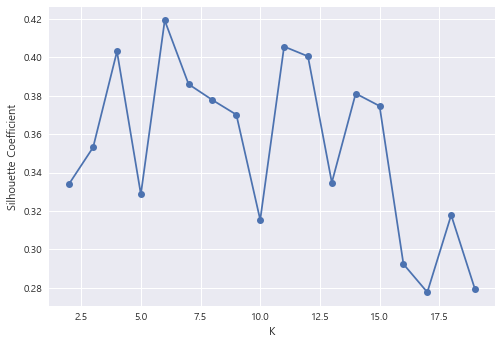

In [189]:

s_score = []
x = data.copy()
for i in range(2, 20) :
    spectral = SpectralClustering(n_clusters=i)
    spectral.fit(x)
    pred = spectral.labels_
    s_score.append(silhouette_score(x, pred))
    
plt.plot(range(2,20), s_score, marker = 'o')
plt.xlabel('K')
plt.ylabel('Silhouette Coefficient')
plt.show()

- spectral의  Silhouette score를 확인해 보면 n_clusters 가 6일 경우 가장 큼을 확인할 수 있다. 

In [190]:
spectral = SpectralClustering(n_clusters=6)
pred_sp = spectral.fit_predict(data)

In [191]:
print('Silhouette_score : ', silhouette_score(data, pred_sp))

Silhouette_score :  0.4191768676715067


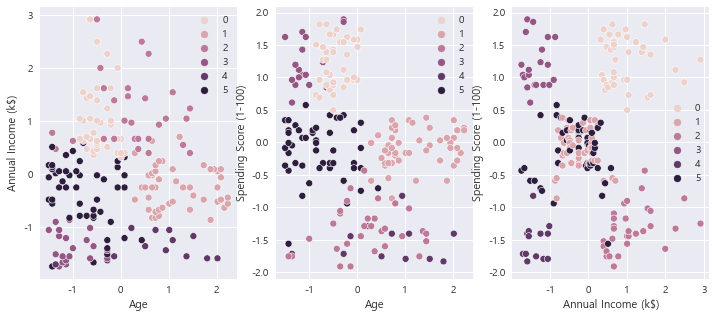

In [192]:
f, axes = plt.subplots(1, len(data.columns), figsize = (12, 5))

sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, hue=pred_sp, ax = axes[0])
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, hue=pred_sp, ax = axes[1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue=pred_sp, ax = axes[2])
plt.show()

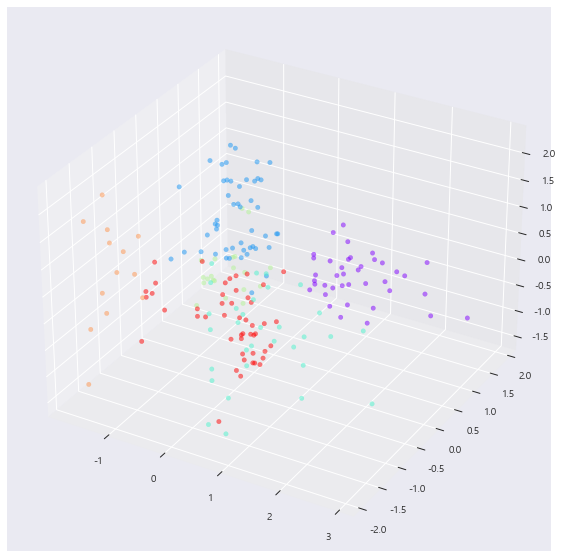

In [193]:
# data clustering 결과 3차원 시각화

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d') 

x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
z = data['Age']
axes.scatter(x, y, z, c = pred_sp, s= 20, alpha=0.5, cmap='rainbow')
plt.show()

- 결과를 확인해 보면 dbscan보다는 군집화가 잘 되었지만 noise에 대하여는 너무 민감한 것을 확인할 수 있다.
- Silhouette_score 도 앞선 dbscan보다 좋음을 볼 수 있다.

### 3. Evaluation

In [195]:
print('Silhouette_score K Means : ', silhouette_score(data, pred_k))
print('Silhouette_score DBSCAN : ', silhouette_score(data, pred_db))
print('Silhouette_score Hierarchical Clustering: ', silhouette_score(data, pred_hc))
print('Silhouette_score Spectral Clustering: ', silhouette_score(data, pred_sp))

Silhouette_score K Means :  0.42742814991580175
Silhouette_score DBSCAN :  0.18451372756506046
Silhouette_score Hierarchical Clustering:  0.28384379984299635
Silhouette_score Spectral Clustering:  0.4191768676715067


- Silhouette_score 를 확인해 보면 K Means의 경우 가장 높은 것으로 나타났다.
- 또한 변수간의 관계를 표현한 plot에서도 K Means의 경우 시각적으로 좋게 나옴을 확인할 수 있다.